# This notebook is devoted to development of the controlled gate shown below

The algorithm is taken from arXiv:quant-ph/0205095

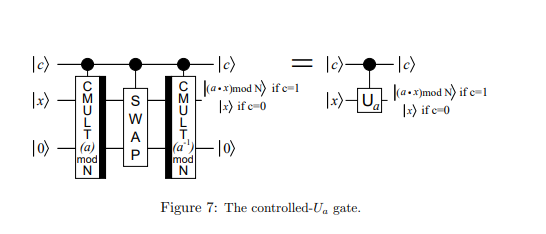

## Important note 1
1. In general, the output of qubits representing b-number should be |0>^bit_size. However, for small number of digits the inverse number a^-1 sometime does not exist. So, the subtraction is performed incorrectly and the output of b is not |0>^bit_size

In [1]:
import qiskit
import numpy as np
import quantum_routines as qr
import classical_routines as cr
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

bit_size = 2

cl_num_a = [0, 1]
cl_num_N = [1, 1]
q_num_x =  [1, 1]
q_num_b =  [0, 0]

cl_control_bits = [1]

initial_a = []
initial_b = []
initial_x = []
initial_N = []

initial_a[:] = cl_num_a[:]
initial_b[:] = q_num_b[:]
initial_x[:] = q_num_x[:]
initial_N[:] = cl_num_N[:]

#cl_num_a = [0] + cl_num_a
#cl_num_N = [0] + cl_num_N
q_num_x = [0] + q_num_x
q_num_b = [0] + q_num_b



q_reg_ctrl = Q_R(1, 'c') # control qubit
q_reg_x = Q_R(bit_size + 1, 'x') # quantum number x
q_reg_b = Q_R(bit_size + 1, 'b') # quantum number b

q_reg_a = Q_R(bit_size + 1, 'ancilla, a') #ancilla qubits for classical number a
q_reg_N = Q_R(bit_size + 1, 'ancilla, N') #ancilla qubits for classical number N

q_anc = Q_R(1, 'ancilla') # ancilla qubit

cl_reg_a = C_R(bit_size + 1, 'a') #classical register for number a
cl_reg_N = C_R(bit_size + 1, 'N') #classical register for number N
cl_reg_meas = C_R(bit_size + 1, 'meas') #classical register for measured number

CQA_gate = qiskit.QuantumCircuit(q_reg_ctrl, q_reg_x, q_reg_b, q_reg_a, q_reg_N, q_anc, cl_reg_a, cl_reg_N, cl_reg_meas)

#preparing quantum number x
CQA_gate = qr.qubit_binary_prepare(q_reg_x, q_num_x, CQA_gate)

#preparing quantum number b
CQA_gate = qr.qubit_binary_prepare(q_reg_b, q_num_b, CQA_gate)

#preparing control qubits
CQA_gate = qr.qubit_binary_prepare(q_reg_ctrl, cl_control_bits, CQA_gate)

instr = qr.ctrl_mult_mod_N(bit_size, cl_num_a, cl_num_N)
qubits = [q_reg_ctrl]
for i in range(bit_size + 1):
    qubits.append(q_reg_x[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_b[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_a[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_N[i])
qubits.append(q_anc)

clbits = []
for i in range(bit_size + 1):
    clbits.append(cl_reg_a[i])
for i in range(bit_size + 1):
    clbits.append(cl_reg_N[i])

CQA_gate.append(instr, qubits, clbits)

for i in range(bit_size+1):
    CQA_gate.swap(q_reg_x[i],q_reg_b[i])

a_int = cr.bin_str_2int(cl_num_a)
N_int = cr.bin_str_2int(cl_num_N)
a_inv_int = cr.euclids_inverse_mod(a_int, N_int)
a_inv = cr.int_2_bin_str(a_inv_int, bit_size)
print(a_inv)

instr = qr.ctrl_mult_mod_N_s(bit_size, a_inv, cl_num_N)
qubits = [q_reg_ctrl]
for i in range(bit_size + 1):
    qubits.append(q_reg_x[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_b[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_a[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_N[i])
qubits.append(q_anc)

clbits = []
for i in range(bit_size + 1):
    clbits.append(cl_reg_a[i])
for i in range(bit_size + 1):
    clbits.append(cl_reg_N[i])

CQA_gate.append(instr, qubits, clbits)

CQA_gate = qr.qubits_meas(q_reg_x, cl_reg_meas, CQA_gate)

#CQA_gate.draw('mpl')

3
1
1
[0, 1]


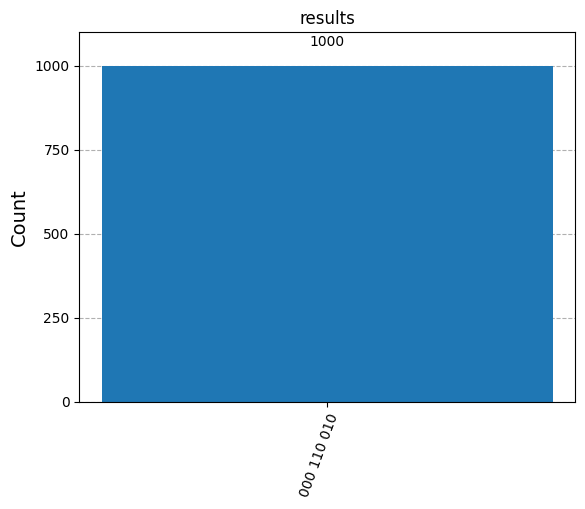

In [47]:
#print('We perfromed (' + str(initial_b) + ' + ' + str(initial_a) + ' * ' + str(initial_x) + ') mod' + str(initial_N) + '.' )
#print('The result is the lowest bit_size bits in the hystogram x-axis notation. The higher the bit is in space the hisgher the bit digit.')
qr.plot_hyst_func(CQA_gate,1000)

# making the same CUA gate but with the function from my quantum_routines library

3
1
1


C:\Users\Oleg\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\circuit\quantumcircuit.py:3263: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


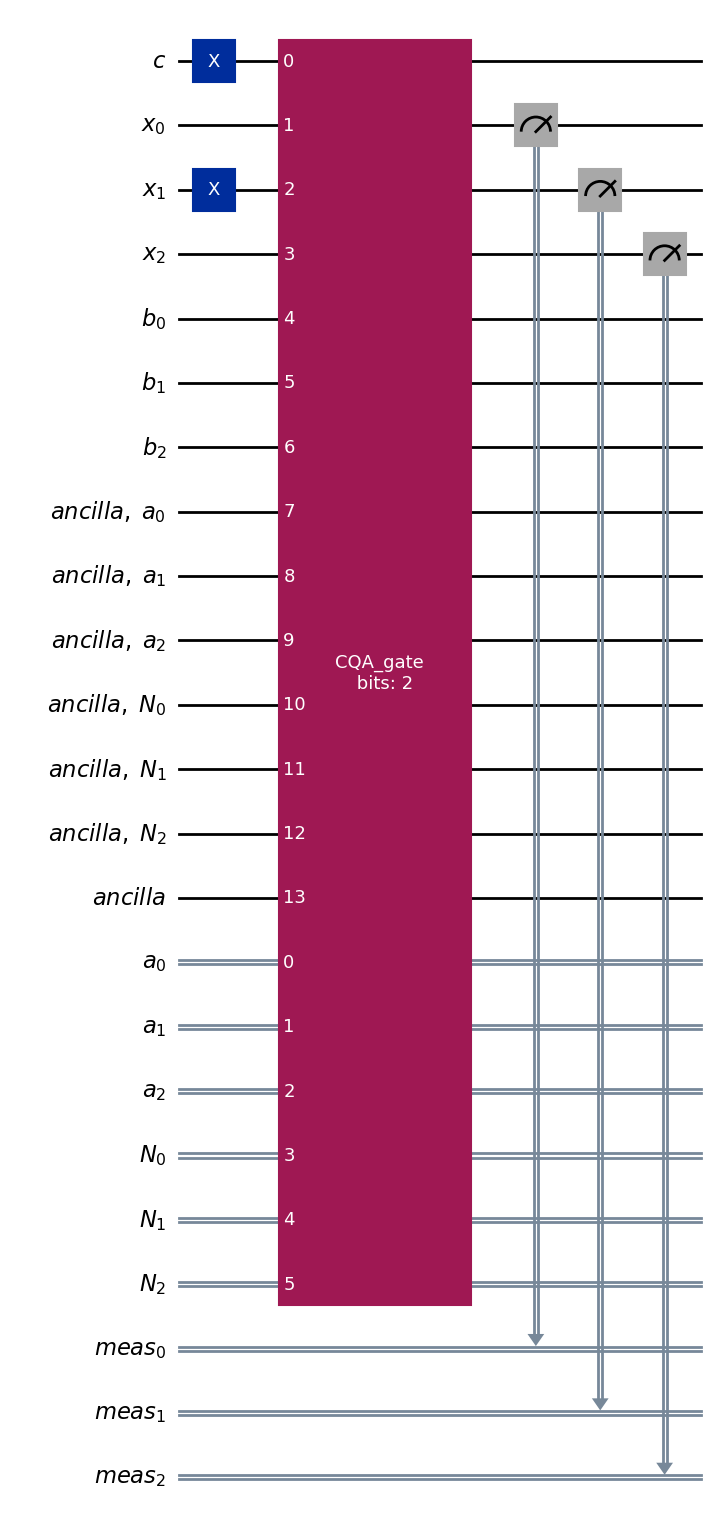

In [28]:
import qiskit
import numpy as np
import quantum_routines as qr
import classical_routines as cr
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

bit_size = 2


cl_num_a = [0, 1]
cl_num_N = [1, 1]
q_num_x =  [1, 0]
q_num_b =  [0, 0]

cl_control_bits = [1]

initial_a = []
initial_b = []
initial_x = []
initial_N = []

initial_a[:] = cl_num_a[:]
initial_b[:] = q_num_b[:]
initial_x[:] = q_num_x[:]
initial_N[:] = cl_num_N[:]

#cl_num_a = [0] + cl_num_a
#cl_num_N = [0] + cl_num_N
q_num_x = [0] + q_num_x
q_num_b = [0] + q_num_b



q_reg_ctrl = Q_R(1, 'c') # control qubit
q_reg_x = Q_R(bit_size + 1, 'x') # quantum number x
q_reg_b = Q_R(bit_size + 1, 'b') # quantum number b

q_reg_a = Q_R(bit_size + 1, 'ancilla, a') #ancilla qubits for classical number a
q_reg_N = Q_R(bit_size + 1, 'ancilla, N') #ancilla qubits for classical number N

q_anc = Q_R(1, 'ancilla') # ancilla qubit

cl_reg_a = C_R(bit_size + 1, 'a') #classical register for number a
cl_reg_N = C_R(bit_size + 1, 'N') #classical register for number N
cl_reg_meas = C_R(bit_size + 1, 'meas') #classical register for measured number

CQA_gate = qiskit.QuantumCircuit(q_reg_ctrl, q_reg_x, q_reg_b, q_reg_a, q_reg_N, q_anc, cl_reg_a, cl_reg_N, cl_reg_meas)

#preparing quantum number x
CQA_gate = qr.qubit_binary_prepare(q_reg_x, q_num_x, CQA_gate)

#preparing quantum number b
CQA_gate = qr.qubit_binary_prepare(q_reg_b, q_num_b, CQA_gate)

#preparing control qubits
#CQA_gate.h(q_reg_ctrl)
CQA_gate = qr.qubit_binary_prepare(q_reg_ctrl, cl_control_bits, CQA_gate)


instr = qr.CQA_inst(bit_size, cl_num_a, cl_num_N)
qubits = [q_reg_ctrl]
for i in range(bit_size + 1):
    qubits.append(q_reg_x[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_b[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_a[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_N[i])
qubits.append(q_anc)

clbits = []
for i in range(bit_size + 1):
    clbits.append(cl_reg_a[i])
for i in range(bit_size + 1):
    clbits.append(cl_reg_N[i])

CQA_gate.append(instr, qubits, clbits)


CQA_gate = qr.qubits_meas(q_reg_x, cl_reg_meas, CQA_gate)

#CQA_gate.measure_all()

CQA_gate.draw('mpl')

In [29]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator


import quantum_routines as qr
import classical_routines as cr
import aux_func as af

In [30]:
import time
shot_num=10
start = time.time()
simulator = Aer.get_backend('qasm_simulator') 
simulator = AerSimulator()
CQA_gate = transpile(CQA_gate, simulator)
result = simulator.run(CQA_gate,shots = shot_num).result()
counts = result.get_counts(CQA_gate)
#qr.plot_hyst_func(CQA_gate,20)
end = time.time()
print(['time elapsed: ' + str(end - start) + ' sec'])


['time elapsed: 0.5599939823150635 sec']


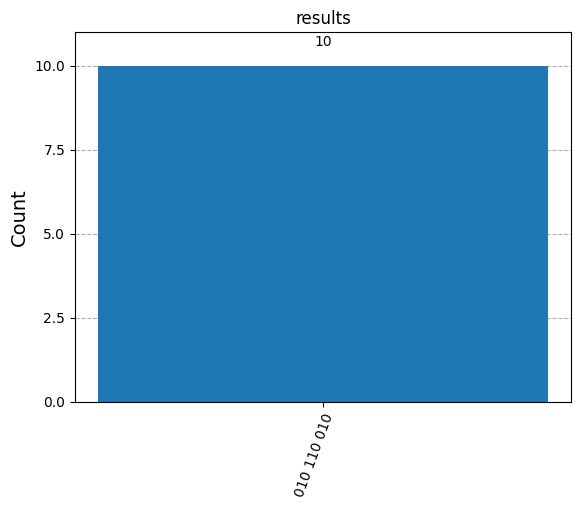

In [31]:
 qr.plot_hyst_func(CQA_gate, 10)

In [27]:
print(counts)

{'00010 11110 00010': 12, '00110 11110 00010': 8}


## The same Ua gate but realized without acnilla qubits for N and a and without classical registers.

Here we do not use classically controlled gate, but just reconficure the gates set for given a and N.

3
1
1


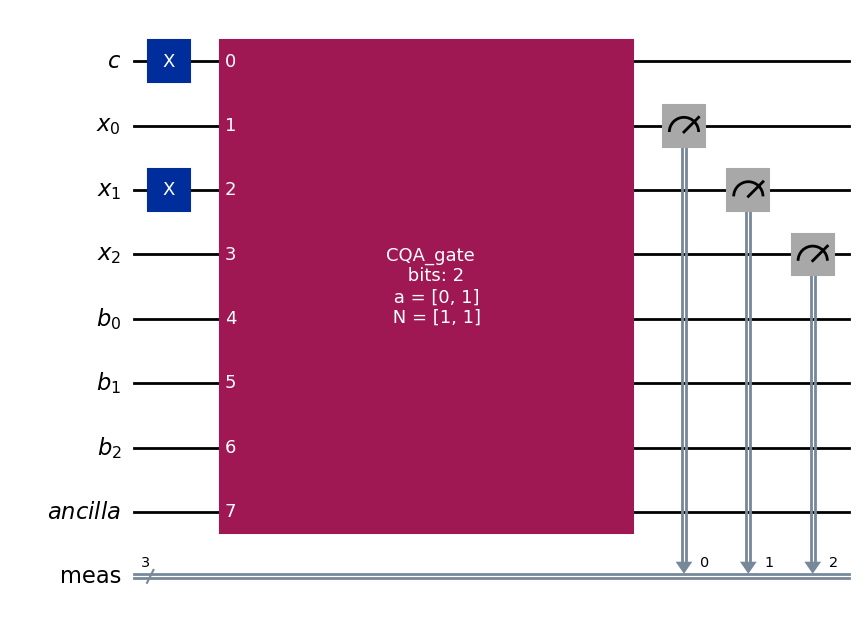

In [34]:
import qiskit
import numpy as np
import quantum_routines as qr
import classical_routines as cr
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

bit_size = 2


cl_num_a = [0, 1]
cl_num_N = [1, 1]
q_num_x =  [1, 0]
q_num_b =  [0, 0]

cl_control_bits = [1]

initial_a = []
initial_b = []
initial_x = []
initial_N = []

initial_a[:] = cl_num_a[:]
initial_b[:] = q_num_b[:]
initial_x[:] = q_num_x[:]
initial_N[:] = cl_num_N[:]

#cl_num_a = [0] + cl_num_a
#cl_num_N = [0] + cl_num_N
q_num_x = [0] + q_num_x
q_num_b = [0] + q_num_b



q_reg_ctrl = Q_R(1, 'c') # control qubit
q_reg_x = Q_R(bit_size + 1, 'x') # quantum number x
q_reg_b = Q_R(bit_size + 1, 'b') # quantum number b

q_anc = Q_R(1, 'ancilla') # ancilla qubit

cl_reg_meas = C_R(bit_size + 1, 'meas') #classical register for measured number

CQA_gate = qiskit.QuantumCircuit(q_reg_ctrl, q_reg_x, q_reg_b, q_anc, cl_reg_meas)

#preparing quantum number x
CQA_gate = qr.qubit_binary_prepare(q_reg_x, q_num_x, CQA_gate)

#preparing quantum number b
CQA_gate = qr.qubit_binary_prepare(q_reg_b, q_num_b, CQA_gate)

#preparing control qubits
#CQA_gate.h(q_reg_ctrl)
CQA_gate = qr.qubit_binary_prepare(q_reg_ctrl, cl_control_bits, CQA_gate)


instr = qr.CQA_gate(bit_size, cl_num_a, cl_num_N)
qubits = [q_reg_ctrl]
for i in range(bit_size + 1):
    qubits.append(q_reg_x[i])
for i in range(bit_size + 1):
    qubits.append(q_reg_b[i])
qubits.append(q_anc)


CQA_gate.append(instr, qubits)



CQA_gate = qr.qubits_meas(q_reg_x, cl_reg_meas, CQA_gate)


CQA_gate.draw('mpl')

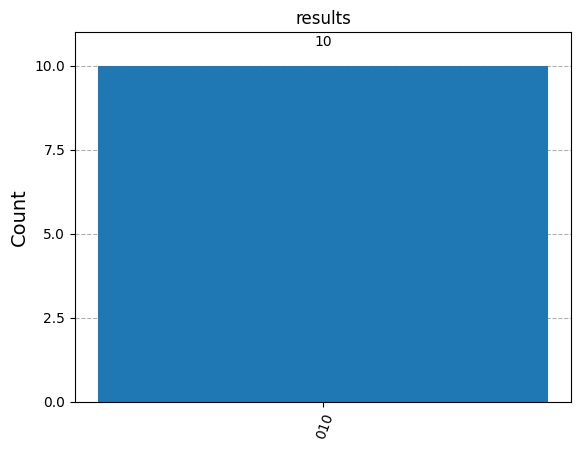

In [33]:
 qr.plot_hyst_func(CQA_gate, 10)